In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skp
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as clf_r
from sklearn.metrics import accuracy_score

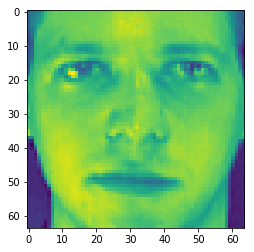

In [95]:
data = np.load('olivetti_faces.npy')
targets = np.load('olivetti_faces_target.npy')
plt.imshow(data[0])

In [96]:
data.shape

(400, 64, 64)

In [97]:
data = data.reshape(data.shape[0], (data.shape[1]*data.shape[2]))
data.shape

(400, 4096)

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(data, targets)

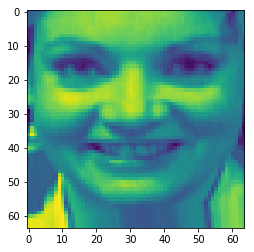

In [99]:
plt.imshow(X_train[0].reshape(64,64))

In [100]:
std_sclr1 = skp.StandardScaler(copy=False).fit(X_train)
std_sclr1.transform(X_train)

array([[-0.5440037 , -0.6478916 , -0.6843528 , ...,  2.2243319 ,
         2.2394888 ,  2.052147  ],
       [-1.2043548 , -1.6274091 , -1.8342873 , ..., -0.7044799 ,
        -0.55405235, -0.5363409 ],
       [ 0.47010714,  0.5542436 ,  0.48687655, ...,  0.16745655,
         0.1786797 ,  0.13389255],
       ...,
       [-0.37891588, -0.8482474 , -1.1954348 , ..., -0.7044799 ,
        -0.64564383, -0.6056754 ],
       [ 0.58802694,  0.44293472,  0.2952208 , ...,  1.7548279 ,
         1.7815312 ,  1.6361399 ],
       [ 0.9653703 ,  0.88817   ,  0.6785323 , ...,  0.32395783,
         0.22447556,  0.24945015]], dtype=float32)

In [101]:
std_sclr1 = skp.StandardScaler(copy=False).fit(X_test)
std_sclr1.transform(X_test)

array([[-1.4431428 , -0.66405845,  0.32538927, ..., -0.09714337,
        -0.08668873, -0.02013637],
       [ 0.7809874 ,  1.0981951 ,  1.066354  , ..., -0.54062366,
        -0.53954005, -0.512358  ],
       [-1.4007785 , -1.6177486 , -1.961016  , ...,  1.6556597 ,
         1.3365583 ,  1.120923  ],
       ...,
       [ 1.1199027 ,  1.0981951 ,  1.0028428 , ..., -0.70956856,
        -0.841441  , -0.7137216 ],
       [ 1.7977327 ,  1.6165047 ,  1.3839104 , ..., -0.13937953,
        -0.12981738, -0.13200489],
       [ 1.3317245 ,  0.95306814,  0.812309  , ..., -1.2164031 ,
        -1.2511636 , -1.3401855 ]], dtype=float32)

In [102]:
C_train = np.cov(X_train.T)
C_test = np.cov(X_test.T)

In [103]:
eig_vals, eig_vecs = np.linalg.eig(C_train)

In [104]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [105]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [106]:
def PCA_n_components(eig_values, exp_var_percentage):
    tot = sum(eig_values)
    var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    num_vec_to_keep = 0
    
    for index, percentage in enumerate(cum_var_exp):
        if percentage > exp_var_percentage:
            num_vec_to_keep = index + 1
            break
            
    return num_vec_to_keep

In [107]:
X_train_num_vec_to_keep = PCA_n_components(eig_vals, 92.0)

In [108]:
X_train_num_features = X_train.shape[1]
X_train_proj_mat = eig_pairs[0][1].reshape(X_train_num_features,1)
for eig_vec_idx in range(1, X_train_num_vec_to_keep):
    X_train_proj_mat = np.hstack((X_train_proj_mat, eig_pairs[eig_vec_idx][1].reshape(X_train_num_features,1)))

In [109]:
X_train_PCA = X_train @ (X_train_proj_mat)
X_test_PCA = X_test @ (X_train_proj_mat)

In [110]:
X_train_PCA = np.real(X_train_PCA)
X_test_PCA = np.real(X_test_PCA)

In [111]:
classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(X_train_PCA, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
Y_pred = classifier.predict(X_test_PCA)

In [113]:
print(clf_r(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       0.50      1.00      0.67         1
          18       1.00    

In [114]:
print(accuracy_score(Y_test,Y_pred))

0.97
